<a href="https://colab.research.google.com/github/PhilipPfeffer/haptic_vest/blob/main/customnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Neural Net

In [1]:
from numpy import loadtxt
import numpy as np
import os
import shutil
import math
import zipfile
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

import sklearn 
from sklearn import metrics
import tensorflow_addons as tfa

#Unzip Dataset

In [2]:
dataset_name = 'dataset_binary'
zip_file_path = '/content/' + dataset_name + '.zip'
unzipped_dir = '/content'
dataset_X = '/content/' + dataset_name
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzipped_dir)

#Create Dataloader

In [3]:
BATCH_SIZE = 32
ORIG_IMG_SIZE = (96, 96)
ORIG_COLOR_MODE ='grayscale'
IMG_SIZE = (96, 96)
COLOR_MODE = 'grayscale'

train_dataset = image_dataset_from_directory(dataset_X +'/train/', label_mode='categorical', shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode=COLOR_MODE)
dev_dataset = image_dataset_from_directory(dataset_X +'/dev/', label_mode='categorical', shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode=COLOR_MODE)
test_dataset = image_dataset_from_directory(dataset_X +'/test/', label_mode='categorical', shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE, color_mode=COLOR_MODE)

Found 33915 files belonging to 2 classes.
Found 5339 files belonging to 2 classes.
Found 2819 files belonging to 2 classes.


In [6]:
def show_example(train_dataset):
  for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = np.asarray(image[0]).squeeze()
    print(first_image.shape)
    # for i in range(9):
    #   ax = plt.subplot(3, 3, i + 1)
      # augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
      # plt.imshow(augmented_image[0] / 255)
    # print(image)
    plt.gray()
    plt.imshow(first_image / 255, plt.get_cmap('gray'))
    plt.axis('off')
    
    break 

# Run with this line:
# show_example(train_dataset)

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
dev_dataset = dev_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Get Dataset (OLD)


In [8]:
# Definitions
# dataset ='/content/drive/My Drive/Haptic Vest/dataset_person_car'
# classes = ['neither', 'person', None , 'car']
# all_processed_imgs_dir = '/content/drive/My Drive/Haptic Vest/person_car_other_imgs_processed'

In [9]:
# train_ids = np.loadtxt(dataset, dtype=(int, int))
# train_ids_dict = dict(train_ids)

In [10]:
# x_train_ids, y_train_ids = train_ids[:,0], train_ids[:,1]
# assert(x_train_ids.shape == y_train_ids.shape)
# x_train_ids[0], y_train_ids[0]
# print(f"There are {len(x_train_ids)} images, set(x_train_ids) = {len(set(x_train_ids))} images.")

In [11]:
# ######################### 
# # CHANGE HERE
# ######################### 
# num_examples_name = '40000'
# ######################### 

# dataset_X_parent = '/content/dataset_' + num_examples_name
# dataset_X = '/content/dataset_' + num_examples_name + '/processed_subset' + num_examples_name
# # os.mkdir(dataset_X_parent)  # Uncomment if directory doesn't exist
# !unzip /content/processed_subset40000.zip -d dataset_40000

## Set sizes

In [12]:
# class_ids = [0,1,3]

In [13]:
# dataset_X_ids = {}
# dataset_X_labels = []
# for entry in os.scandir(dataset_X):
#   if entry.is_dir() or os.path.basename(entry)[0] == '.':
#     continue
#   id = int(os.path.basename(entry)[:-4])
#   dataset_X_ids[id] = train_ids_dict[id]
#   dataset_X_labels.append(train_ids_dict[id])

# print(len(dataset_X_ids))
# print(len(dataset_X_labels))

In [14]:
# dev_pct = 0.1
# test_pct = 0.05
# train_pct = 1 - dev_pct - test_pct
# assert (dev_pct + test_pct + train_pct == 1)

In [15]:
# num_neither = np.sum(np.array(dataset_X_labels)==0)
# num_person = np.sum(np.array(dataset_X_labels)==1)
# num_car = np.sum(np.array(dataset_X_labels)==3)
# num_class_examples = {0:num_neither, 1:num_person, 3: num_car}
# print(num_class_examples, num_neither +num_person + num_car)

In [16]:
# num_test = {key: int(test_pct * num_class) for key, num_class in num_class_examples.items()}
# num_dev = {key: int(dev_pct * num_class) for key, num_class in num_class_examples.items()}
# num_train = {class_id: num_class_examples[class_id] - num_dev[class_id] - num_test[class_id] for class_id in class_ids}

# print(num_test, "\n", num_dev, "\n", num_train)

In [17]:
# # In case of fuck up, reset folders
# !rm -r /content/dataset_40000/processed_subset40000/dev
# !rm -r /content/dataset_40000/processed_subset40000/test
# !rm -r /content/dataset_40000/processed_subset40000/train

# !mkdir /content/dataset_40000/processed_subset40000/dev
# !mkdir /content/dataset_40000/processed_subset40000/dev/0
# !mkdir /content/dataset_40000/processed_subset40000/dev/1
# !mkdir /content/dataset_40000/processed_subset40000/dev/3

# !mkdir /content/dataset_40000/processed_subset40000/test
# !mkdir /content/dataset_40000/processed_subset40000/test/0
# !mkdir /content/dataset_40000/processed_subset40000/test/1
# !mkdir /content/dataset_40000/processed_subset40000/test/3

# !mkdir /content/dataset_40000/processed_subset40000/train
# !mkdir /content/dataset_40000/processed_subset40000/train/0
# !mkdir /content/dataset_40000/processed_subset40000/train/1
# !mkdir /content/dataset_40000/processed_subset40000/train/3

In [18]:
# def path_to_id(path):
#   return int(os.path.basename(entry)[:-4])

In [19]:
# num_test_done = {class_id: 0 for class_id in class_ids}
# num_dev_done = {class_id: 0 for class_id in class_ids}
# num_train_done = {class_id: 0 for class_id in class_ids}
# for idx, entry in enumerate(os.scandir(dataset_X)):
#   if entry.is_dir() or os.path.basename(entry)[0] == '.':
#     continue
#   id = path_to_id(entry)
#   label = train_ids_dict[id]
  
#   if num_train_done[label] != num_train[label]:
#     num_train_done[label] += 1
#     shutil.copyfile(entry, dataset_X + '/train/' + str(label) + '/' + os.path.basename(entry))
#   elif num_dev_done[label] != num_dev[label]:
#     num_dev_done[label] += 1
#     shutil.copyfile(entry, dataset_X + '/dev/' + str(label) + '/' + os.path.basename(entry))
#   elif num_test_done[label] != num_test[label]:
#     num_test_done[label] += 1
#     shutil.copyfile(entry, dataset_X + '/test/' + str(label) + '/' + os.path.basename(entry))
  
#   if idx % 5000 == 0:
#     print(idx, num_train_done, num_dev_done, num_test_done)

In [20]:
# print(num_train_done, num_dev_done, num_test_done)

In [21]:
# # create generator
# datagen_X = ImageDataGenerator()
# # prepare an iterators for each dataset
# train_it = datagen_X.flow_from_directory(dataset_X +'/train/', class_mode='categorical', color_mode='grayscale', target_size=(96,96))
# dev_it = datagen_X.flow_from_directory(dataset_X +'/dev/', class_mode='categorical', color_mode='grayscale', target_size=(96,96))
# test_it = datagen_X.flow_from_directory(dataset_X +'/test/', class_mode='categorical', color_mode='grayscale', target_size=(96,96))
# # confirm the iterator works
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# GPU Setup

In [22]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Create Model

In [32]:
num_classes = 2

last_layer = Dense(2, activation='softmax') if num_classes == 2 else Dense(3, activation='softmax')

In [33]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1], 1)),  # 96x96 greyscale image
        layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation="relu"),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation="relu"),
        layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation="relu"),        # layers.MaxPool2D(),
        layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(name='flatten'),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(64, activation='relu'),
        last_layer  
    ]
)

In [43]:
model_full = keras.Sequential(
    [
        keras.Input(shape=(IMG_SIZE[0],IMG_SIZE[1], 1)),  # 96x96 greyscale image
        layers.Flatten(name='flatten'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        last_layer
    ]
)

In [44]:
model = model_full
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_43 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_44 (Dense)             (None, 128)              

In [45]:
# Compile model with accuracy and weighted F1 Score
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tfa.metrics.F1Score(num_classes=num_classes, average="weighted")])

In [49]:
# Configure eary stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

# Initial Model Training

## Initial results without training

In [46]:
loss0, accuracy0, f1_score0 = model.evaluate(dev_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))
print("initial f1_score: {:.2f}".format(f1_score0))

167/167 [==============================] - 2s 13ms/step - loss: 1.3550 - accuracy: 0.5001 - f1_score: 0.3334
initial loss: 1.36
initial accuracy: 0.50
initial f1_score: 0.33


## Fit (Initial)

In [47]:
initial_epochs = 20

In [48]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_dataset,
                  epochs=initial_epochs,
                  validation_data=dev_dataset,
                  )
  # model.fit(train_it, epochs=20, batch_size=batchX.shape[0], validation_data=dev_it, validation_batch_size=batchX.shape[0])

Epoch 1/20
1060/1060 [==============================] - 17s 16ms/step - loss: 0.4908 - accuracy: 0.7804 - f1_score: 0.7768 - val_loss: 0.4492 - val_accuracy: 0.7928 - val_f1_score: 0.7928
Epoch 2/20
1060/1060 [==============================] - 17s 16ms/step - loss: 0.4153 - accuracy: 0.8181 - f1_score: 0.8161 - val_loss: 0.4513 - val_accuracy: 0.7880 - val_f1_score: 0.7844
Epoch 3/20
1060/1060 [==============================] - 18s 17ms/step - loss: 0.3830 - accuracy: 0.8338 - f1_score: 0.8322 - val_loss: 0.4055 - val_accuracy: 0.8245 - val_f1_score: 0.8233
Epoch 4/20
1060/1060 [==============================] - 17s 16ms/step - loss: 0.3566 - accuracy: 0.8491 - f1_score: 0.8483 - val_loss: 0.3619 - val_accuracy: 0.8430 - val_f1_score: 0.8429
Epoch 5/20
1060/1060 [==============================] - 17s 16ms/step - loss: 0.3410 - accuracy: 0.8552 - f1_score: 0.8548 - val_loss: 0.3958 - val_accuracy: 0.8305 - val_f1_score: 0.8295
Epoch 6/20
1060/1060 [==============================] - 17s 

## Learning Plot

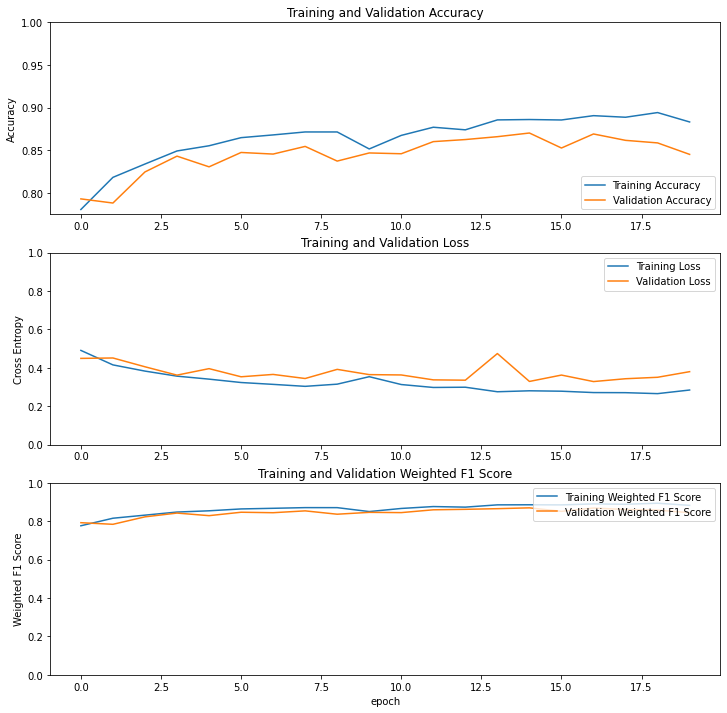

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(3, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')

plt.subplot(3, 1, 3)
plt.plot(f1_score, label='Training Weighted F1 Score')
plt.plot(val_f1_score, label='Validation Weighted F1 Score')
plt.legend(loc='upper right')
plt.ylabel('Weighted F1 Score')
plt.ylim([0,1.0])
plt.title('Training and Validation Weighted F1 Score')
plt.xlabel('epoch')
plt.show()

# Rounded Weights Evaluation

In [ ]:
def modify_weights(weights, transform):
  for layer_num, layer_weights in enumerate(weights):
    if layer_num == len(weights)-1:
      print(f"=============== Layer {layer_num} ===============\n")
      print(transform(layer_weights))
      print('\n')

def round2(layer_weights):
  return np.round_(layer_weights, 2)

def closest_pow_2(layer_weights):
  return 2**(-np.round_(np.log2(np.absolute(layer_weights))))

transform = round2
transform = closest_pow_2

weights = model.get_weights() # returs a numpy list of weights
modify_weights(weights, transform)

=============== Layer 17 ===============

[  8. 256.   2.]




# Evaluate on Test Set
(COMMENTED until development finished)

In [ ]:
# _, accuracy = model.evaluate(dev_it)
# print('Accuracy: %.2f' % (accuracy*100))

# Convert tf model to tflite

In [ ]:
# Convert
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)